<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 1</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno / Fernando Martínez<p> 
</div>

#### Importamos alguno de los modulos a utilizar 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy() 

#### Breve resumen del dataset

In [4]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753
std,487.868210,2755.563853,1145.616719,4043.795272
min,438.920000,1911.700000,2876.600000,7054.980000
25%,992.715221,4070.460000,4486.730000,10701.130000
50%,1233.761241,5774.260000,5663.300000,15030.510000
75%,1460.250000,7445.560000,6304.630175,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [5]:
df_comp.spx.mean()

1288.6425471322264

In [6]:
df_comp.head(10)

,date,spx,dax,ftse,nikkei
0,7/1/1994,469.90,2224.95,3445.98,18124.01
1,10/1/1994,475.27,2225.00,3440.58,18443.44
2,11/1/1994,474.13,2228.10,3413.77,18485.25
3,12/1/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26
5,14/01/1994,474.91,2151.05,3400.56,18973.70
6,17/01/1994,473.30,2115.56,3407.83,18725.37
7,18/01/1994,474.25,2130.35,3437.01,18514.55
8,19/01/1994,474.30,2132.52,3475.15,19039.40
9,20/01/1994,474.98,2098.36,3469.99,19183.92


In [7]:
df_comp.date.describe()

count         6277
unique        6277
top       7/1/1994
freq             1
Name: date, dtype: object

In [8]:
df_comp.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

#### Visualizaciones de las variables


Text(0.5, 1.0, 'Histograma de spx')

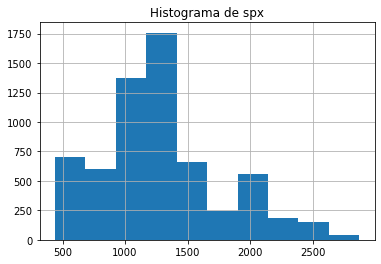

In [9]:
# Histograms
df_comp.spx.hist()
plt.title('Histograma de spx')

Text(0.5, 1.0, 'Histograma de dax')

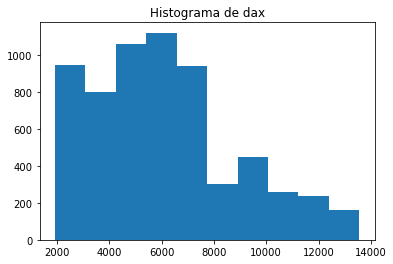

In [10]:
plt.hist(df_comp['dax'])
plt.title('Histograma de dax')

Text(0.5, 1.0, 'Histograma de ftse')

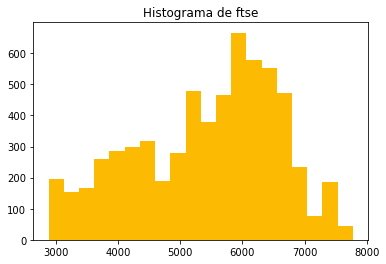

In [11]:
plt.hist(df_comp['ftse'],bins=20,color='#fcba03')
plt.title('Histograma de ftse')

Text(0.5, 1.0, 'Histograma de nikkei')

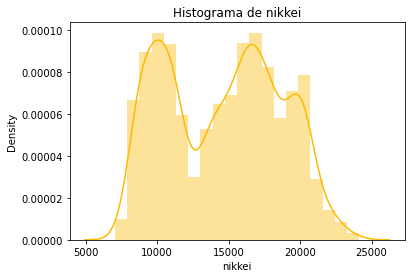

In [12]:
sns.distplot(df_comp['nikkei'],bins=20,color='#fcba03')
plt.title('Histograma de nikkei')

#### Adaptamos el dataset para trabajarlo segun sus series temporales

In [13]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True) 

In [14]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [15]:
df_comp.date.describe()

count                    6277
unique                   6277
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [97]:
df_comp.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

####  Seteamos como index del dataset segun el dia

In [16]:
df_comp.set_index("date")

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [99]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [100]:
df_comp.set_index("date", inplace=True)

In [101]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Adaptamos el datset segun la frecuencia de la serie temporal dada, donde:

<ul>
  <li>h: Cada hora</li>
  <li>w: Semanalmente</li>
  <li>d: Diario</li>
  <li>m: Mensual</li>
  <li>b: Dias labolares</li>
</ul>


In [102]:
df_comp=df_comp.asfreq('d')

In [103]:
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [104]:
df_comp=df_comp.asfreq('b')

In [105]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [106]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [107]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

####  Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

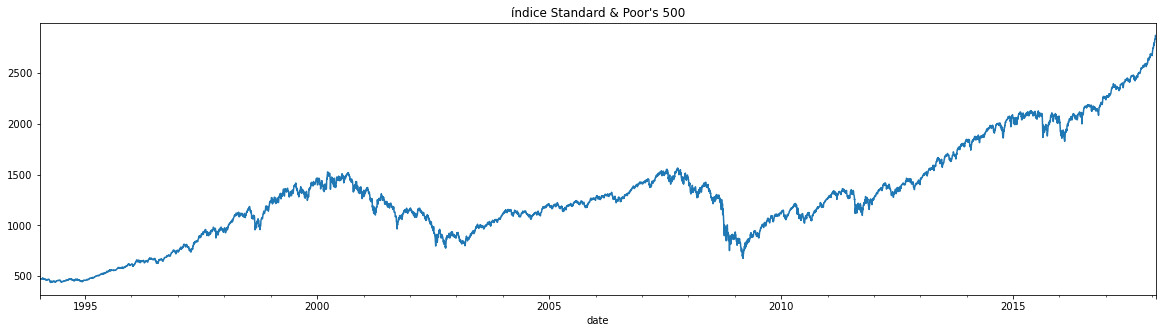

In [108]:
df_comp.spx.plot(figsize=(20,5), title = "índice Standard & Poor's 500")
plt.show()

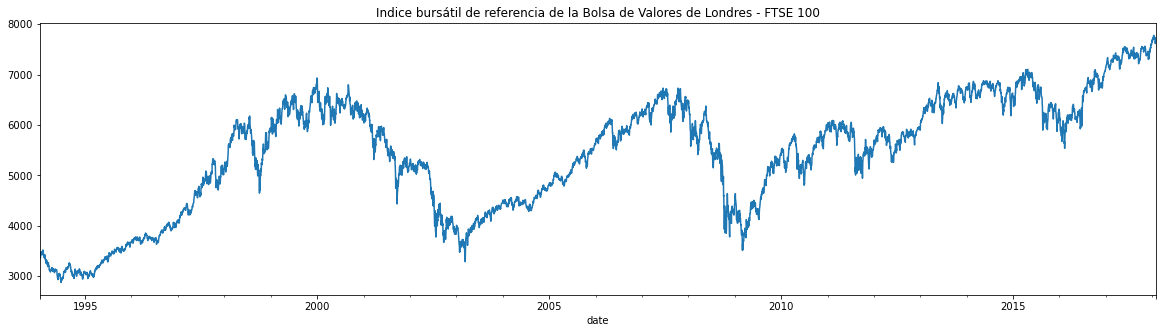

In [109]:
df_comp.ftse.plot(figsize=(20,5), title = "Indice bursátil de referencia de la Bolsa de Valores de Londres - FTSE 100")
plt.show()

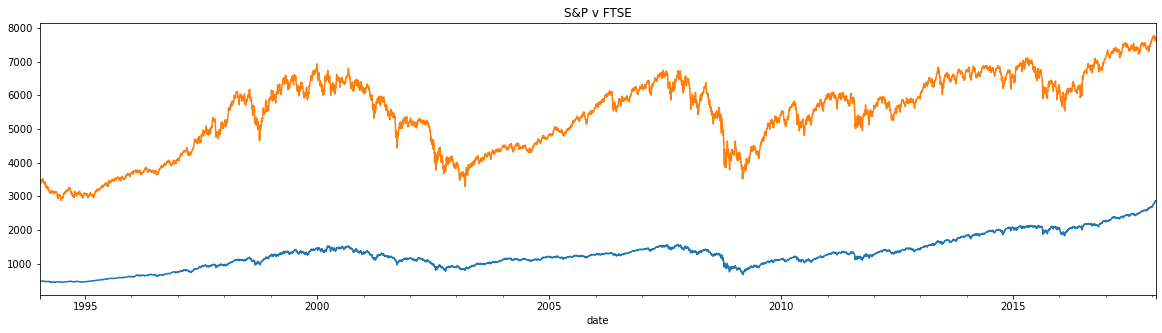

In [110]:
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5))
plt.title("S&P v FTSE")
plt.show()

#### Gráfico Q-Q

In [111]:
import scipy.stats
import pylab

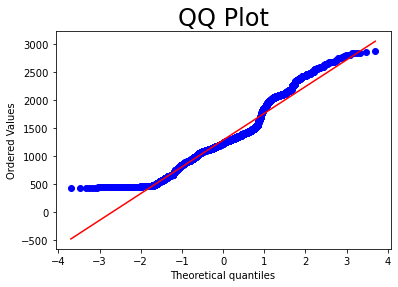

In [112]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

#### Descomposición de Series Temporales

In [113]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

##### Descomposicion Aditiva

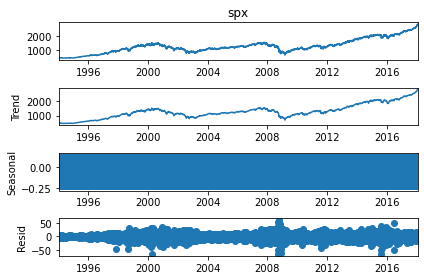

In [114]:
s_dec_additive = seasonal_decompose(df_comp.spx, model = "adittive")
s_dec_additive.plot()
plt.show()

##### Descomposicion Multiplicativa

In [115]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0] 

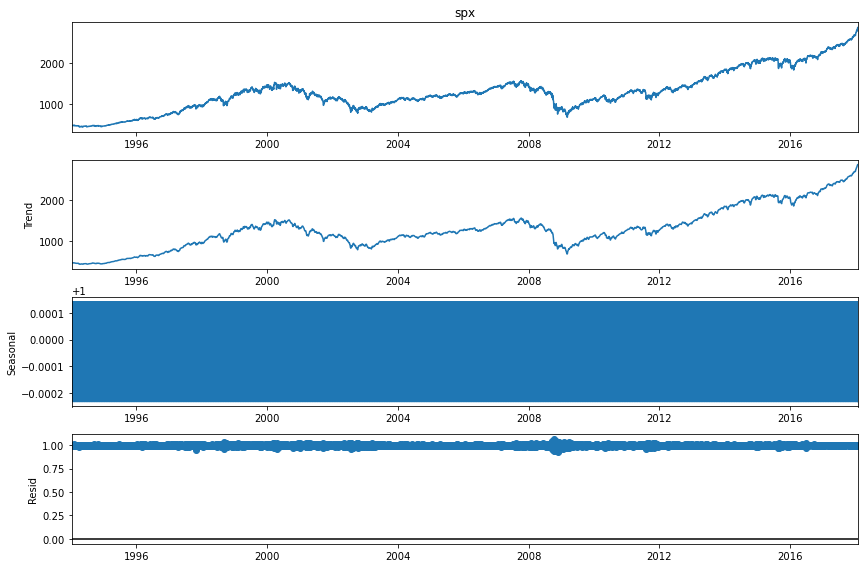

In [116]:
s_dec_multiplicative = seasonal_decompose(df_comp.spx, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

####  Representación gráfica de la Función de Autocorrelación

In [117]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [118]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0] 

##### Grafico ACF del  indice Standard & Poor's 500 (SPX)

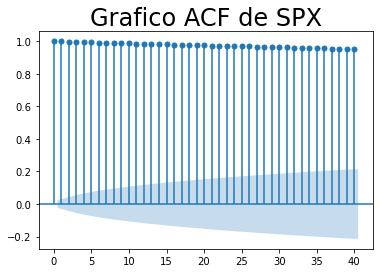

In [119]:
plot_acf(df_comp.spx,lags=40)
plt.title("Grafico ACF de SPX", size= 24)
plt.show()

#####  Grafico ACF del indice "DAX"

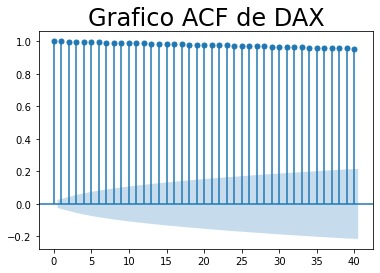

In [120]:
plot_acf(df_comp.dax,lags=40)
plt.title("Grafico ACF de DAX", size= 24)
plt.show()

#####  Grafico ACF del indice "ftse"

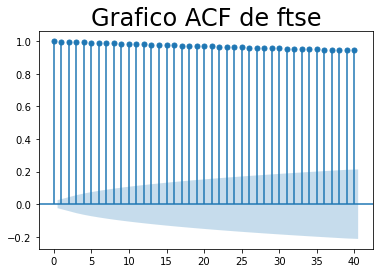

In [121]:
plot_acf(df_comp.ftse,lags=40)
plt.title("Grafico ACF de ftse", size= 24)
plt.show()

#####  Grafico ACF del indice "nikkei" 

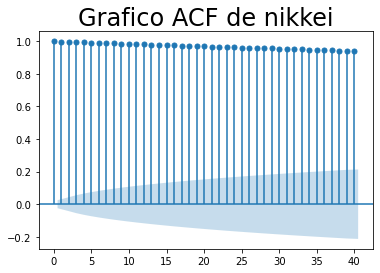

In [122]:
plot_acf(df_comp.nikkei,lags=40)
plt.title("Grafico ACF de nikkei", size= 24)
plt.show()

#### APLICAMOS UNA TRANSFORMACION DE LA SERIE

In [125]:
primera_diffs=df_comp.spx.values[1:]-df_comp.spx.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [126]:
df_comp['primera_diffs_spx']=primera_diffs

In [127]:
df_comp.head()

,spx,dax,ftse,nikkei,primera_diffs_spx
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,5.37
1994-01-10,475.27,2225.00,3440.58,18443.44,-1.14
1994-01-11,474.13,2228.10,3413.77,18485.25,0.04
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.70
1994-01-13,472.47,2142.37,3360.01,18577.26,2.44


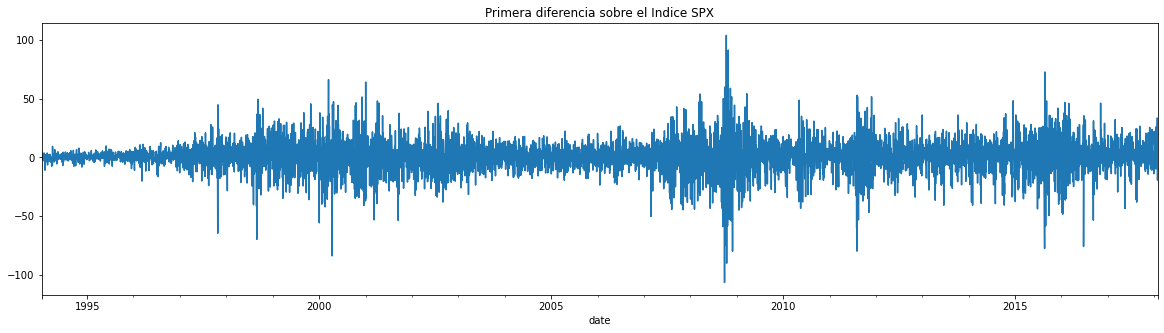

In [129]:
#grafico este indice con las diferencias aplicadas fila a fila
df_comp.primera_diffs_spx.plot(figsize=(20,5), title = "Primera diferencia sobre el Indice SPX")
plt.show()

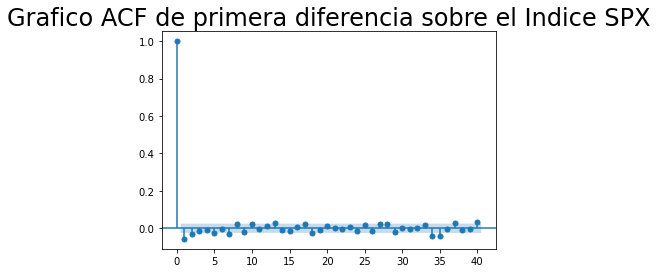

In [130]:
plot_acf(df_comp.primera_diffs_spx,lags=40)
plt.title("Grafico ACF de primera diferencia sobre el Indice SPX", size= 24)
plt.show()

#### Ruido Blanco

In [65]:
wn = np.random.normal(loc = df_comp.spx.mean(), scale = df_comp.spx.std(), size = len(df_comp))

In [66]:
df_comp['wn'] = wn

In [67]:
df_comp.describe()

,spx,dax,ftse,nikkei,wn
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,1297.586674
std,487.868210,2755.563853,1145.616719,4043.795272,484.947595
min,438.920000,1911.700000,2876.600000,7054.980000,-332.398099
25%,992.715221,4070.460000,4486.730000,10701.130000,966.907615
50%,1233.761241,5774.260000,5663.300000,15030.510000,1303.715151
75%,1460.250000,7445.560000,6304.630175,17860.470000,1628.455560
max,2872.867839,13559.600000,7778.637689,24124.150000,2795.448594


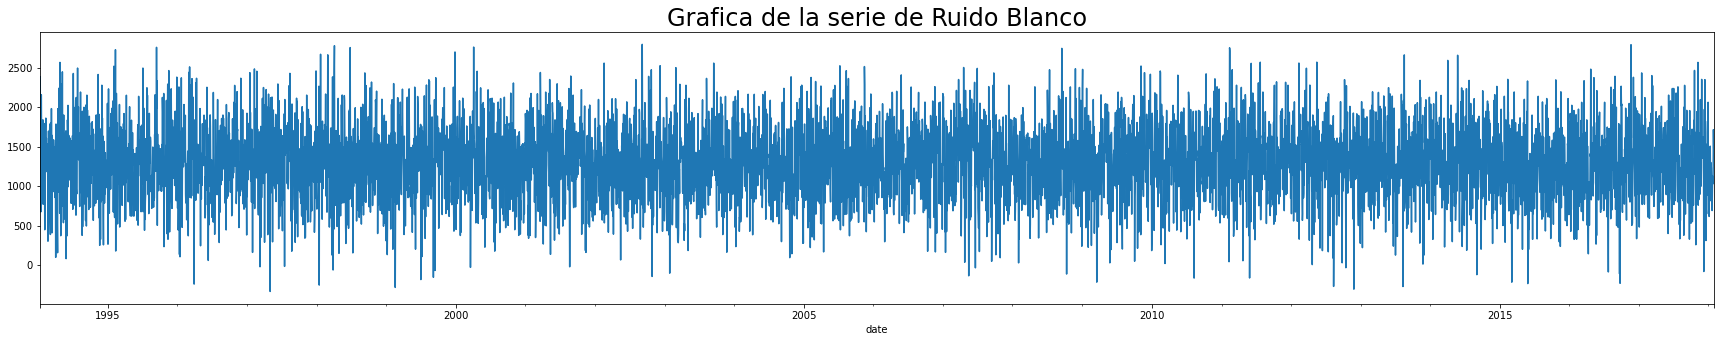

In [68]:
df_comp.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco", size= 24)
plt.show()

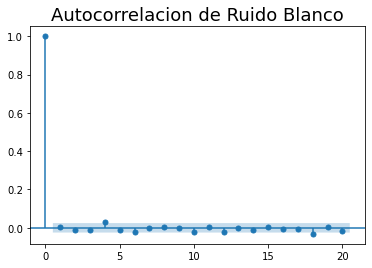

In [69]:
plot_acf(df_comp.wn, lags=20)
plt.title("Autocorrelacion de Ruido Blanco", size= 18)
plt.show()

#### Random Walk

In [70]:
# Simulamos el proceso
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk=np.cumsum(steps)

In [71]:
random_walk[:10]

array([ 0.        , -0.73292501, -0.98792554, -0.8317196 , -0.36327506,
       -0.92630399, -0.96592871, -1.65895596, -3.14508982, -3.71735172])

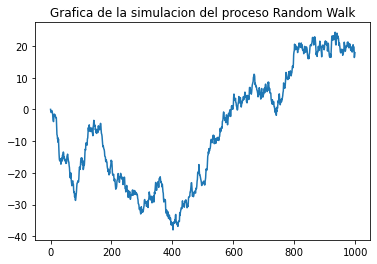

In [72]:
plt.plot(random_walk)
plt.title("Grafica de la simulacion del proceso Random Walk")
plt.show()

In [73]:
random_walk_acf_coef = acf(random_walk)
random_walk_acf_coef

array([1.        , 0.99761436, 0.99512727, 0.9926919 , 0.98998559,
       0.98732026, 0.98462708, 0.98177306, 0.97893817, 0.97597216,
       0.97308166, 0.97002551, 0.96689732, 0.96397021, 0.96097652,
       0.9580059 , 0.95501082, 0.95182995, 0.94841121, 0.94514435,
       0.94184249, 0.93866255, 0.93541597, 0.93211074, 0.9287956 ,
       0.92545251, 0.92230729, 0.91919747, 0.91625321, 0.91325444,
       0.91016975, 0.90703958, 0.90389139, 0.90074562, 0.8973988 ,
       0.89400755, 0.89058851, 0.88719646, 0.88385176, 0.88051879,
       0.87700885])

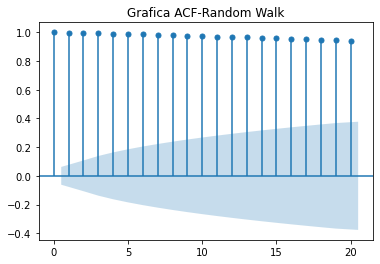

In [131]:
plot_acf(random_walk, lags=20)
plt.title("Grafica ACF-Random Walk")
plt.show()

<div class="alert alert-block alert-info">
<center>¡Muchas gracias por su atencion!</center>
</div>    